In [1]:
import jieba as jb
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [5]:
#sentence = "流拍不断市场降温 豆一能否挺住？"
#breakword = jb.cut(sentence, cut_all=False)
#print("|".join(breakword))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.988 seconds.
Prefix dict has been built successfully.


'流拍|不断|市场|降温| |豆一|能否|挺住|？'

In [12]:
#jb.set_dictionary('C:/Users/user/Prepwork/Stock scrape/Stock Sentiment Jieba/dict.txt.big.txt') # load 繁體 dict
#jb.load_userdict('C:/Users/user/Prepwork/Stock scrape/Stock Sentiment Jieba/user_custom_word.txt') # load 自己 custom words
#with open('C:/Users/user/Prepwork/Stock scrape/Stock Sentiment Jieba/stopWord_test.txt', 'r', encoding='utf-8-sig') as f:
#    stops = f.read().split('\n')
#sentence = "PTA旺季不旺天量库存 价格该何去何从？".replace(' ','')
#breakword = jb.cut(sentence, cut_all=False)
#words = []
#for word in breakword:
#    if word not in stops:
#        words.append(word)
#print("|".join(words))

PTA|旺季|不旺|天量|库存|价格|该|何去何从|？


In [2]:
df1 = pd.read_csv('aastock_期市要聞_2020_09_10.csv', encoding='utf-16')
df2 = pd.read_csv('aastock_期货_2020_09_10.csv', encoding='utf-16')
df3 = pd.read_csv('aastock_市场动态_2020_09_10.csv', encoding='utf-16')
df4 = pd.read_csv('aastock_宏观研究_2020_09_10.csv', encoding='utf-16')

In [3]:
def count_word(df) -> list : 
    words = []
    with open('C:/Users/user/Prepwork/Stock scrape/Stock Sentiment Jieba/chinese_zh_CN_stopwords.txt', 'r', encoding='utf-8-sig') as f:
        stops = f.read().split('\n')
    with open('C:/Users/user/Prepwork/Stock scrape/Stock Sentiment Jieba/stopWord_test.txt', 'r', encoding='utf-8-sig') as w:
        stops2 = w.read().split('\n')
    for sentence in df:
        cut_words = jb.cut(sentence.replace(' ',''), cut_all=False) #jieba object -> (str)
        list_words = ",".join(cut_words).split(',') # (str) -> (list)
        for word in list_words:
            if word not in stops2:
                if word not in stops2:
                    words.append(word)
    return words

def plot_wordcloud(words):
    diction = Counter(words)

    font = 'msyh.ttc'
    wordcloud = WordCloud(font_path = font)
    wordcloud.generate_from_frequencies(frequencies=diction)

    plt.figure(figsize=(6,6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Building prefix dict from the default dictionary ...


期市要聞


Dumping model to file cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.776 seconds.
Prefix dict has been built successfully.


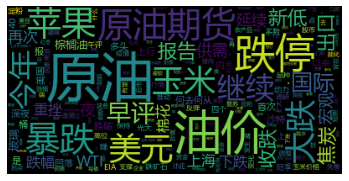

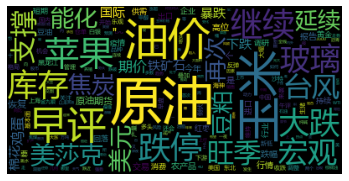

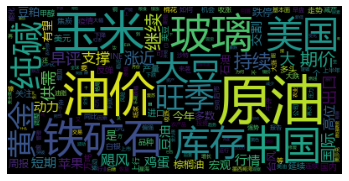

In [4]:
print("期市要聞")
plot_wordcloud(count_word(df1['title'][:100]))
plot_wordcloud(count_word(df1['title'][:300]))
plot_wordcloud(count_word(df1['title']))

期货


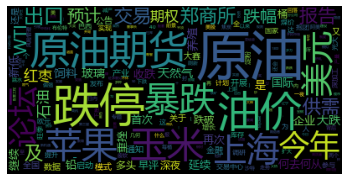

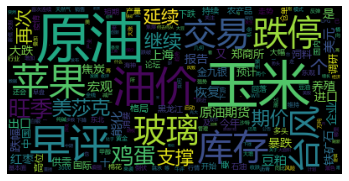

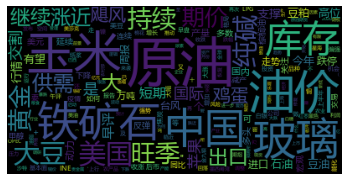

In [5]:
print("期货")
plot_wordcloud(count_word(df2['title'][:100]))
plot_wordcloud(count_word(df2['title'][:300]))
plot_wordcloud(count_word(df2['title'][:]))

市场动态


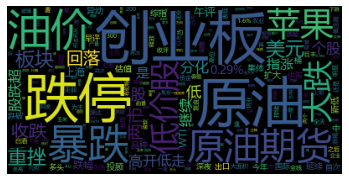

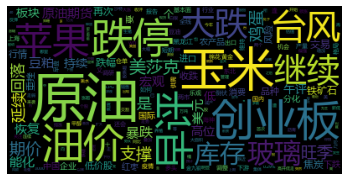

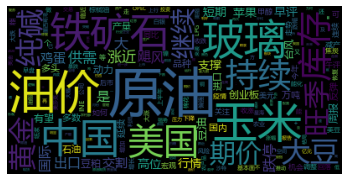

In [6]:
print("市场动态")
plot_wordcloud(count_word(df3['title'][:100]))
plot_wordcloud(count_word(df3['title'][:300]))
plot_wordcloud(count_word(df3['title'][:]))

宏观研究


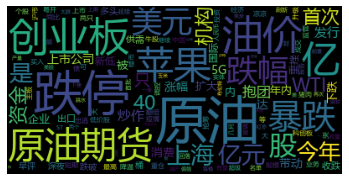

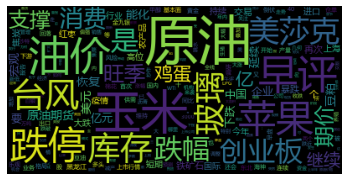

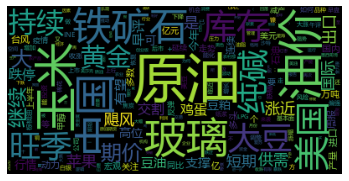

In [7]:
print("宏观研究")
plot_wordcloud(count_word(df4['title'][:100]))
plot_wordcloud(count_word(df4['title'][:300]))
plot_wordcloud(count_word(df4['title'][:]))

In [123]:
Counter(count_word(df1['title'][:100])).most_common()

[('铁矿石', 10),
 ('黄金', 8),
 ('白银', 7),
 ('美元', 7),
 ('纯碱', 6),
 ('原油', 6),
 ('库存', 6),
 ('中国', 6),
 ('镍', 5),
 ('风险', 5),
 ('玻璃', 4),
 ('号胶', 4),
 ('进口', 4),
 ('银涨', 4),
 ('金价', 4),
 ('提示', 4),
 ('大涨', 4),
 ('向', 3),
 ('做', 3),
 ('鸡蛋', 3),
 ('跌近', 3),
 ('大豆', 3),
 ('100%', 3),
 ('金银', 3),
 ('空间', 3),
 ('国际', 3),
 ('分析', 3),
 ('夜盘', 3),
 ('投资', 3),
 ('锌', 3),
 ('现货', 3),
 ('压力', 3),
 ('豆粕', 3),
 ('集体', 3),
 ('流拍', 2),
 ('不断', 2),
 ('恢复', 2),
 ('继续', 2),
 ('大', 2),
 ('探底', 2),
 ('INE', 2),
 ('彻底', 2),
 ('飙升', 2),
 ('新低', 2),
 ('收评', 2),
 ('一度', 2),
 ('是', 2),
 ('成交', 2),
 ('低', 2),
 ('油价', 2),
 ('长期', 2),
 ('石油', 2),
 ('专家', 2),
 ('PTA', 2),
 ('何去何从', 2),
 ('呈现', 2),
 ('利润', 2),
 ('同比', 2),
 ('因', 2),
 ('关注', 2),
 ('改善', 2),
 ('个', 2),
 ('增加', 2),
 ('高', 2),
 ('后市', 2),
 ('涨幅', 2),
 ('加拿大', 2),
 ('期价', 2),
 ('银', 2),
 ('触及', 2),
 ('矿山', 2),
 ('大量', 2),
 ('李鬼', 2),
 ('贵金属', 2),
 ('多头', 2),
 ('42', 2),
 ('回暖', 2),
 ('900', 2),
 ('大商所', 2),
 ('发', 2),
 ('函', 2),
 ('油脂', 2),
 ('上行', 2),
 ('中期

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache


全面研究


Loading model cost 0.566 seconds.
Prefix dict has been built successfully.


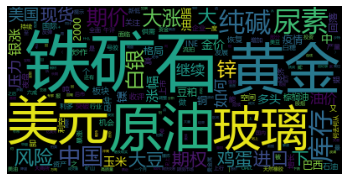

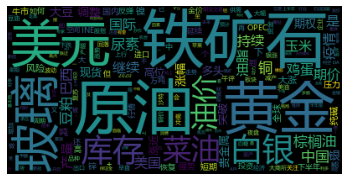

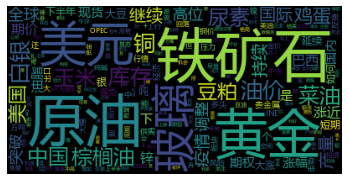

In [6]:
df_all = pd.concat([df1,df2,df3,df4])
print("全面研究")
plot_wordcloud(count_word(df_all['title'][:300]))
plot_wordcloud(count_word(df_all['title'][:900]))
plot_wordcloud(count_word(df_all['title'][:]))

In [127]:
df1.sort_values(by='Time', ascending=False)

,Time,title
0,(08月07日 18:11),流拍不断市场降温 豆一能否挺住？
1,(08月07日 16:35),农业农村部：生猪生产持续恢复向好 价格继续上涨可能性不大
2,(08月07日 16:15),中银国际期货：纯碱期货探底回升 建议逢回调做多
3,(08月07日 16:02),INE原油收跌 白宫和民主党谈判面临彻底翻脸
4,(08月07日 15:57),铁矿石期货四个月飙升逾五成 谁在推涨？
...,...,...
985,(07月09日 12:17),USDA：中国饲料需求大增 大豆压榨量预计突破9000万吨
986,(07月09日 11:43),基本金属领涨期市：沪锌涨近4% 沪铜涨近2%
987,(07月09日 11:40),徽商期货与太保财险新疆分公司签署合作框架协议
988,(07月09日 11:03),创新扶贫不松劲 三载耕耘显初心 金瑞期货扶贫考评位列第九


In [ ]:
中粮肉食 分析 资金面 净买入 净卖出 十大净买入/卖出经纪商 实时